# Lista 3 - Exercício 2

Considere um problema de duas classes, bidimensional, com os seguintes parâmetros das classes (distribuição Gaussiana):

$$
\begin{gather*}
\mu_1 = [0, 2]^T \\
\Sigma_1 = \begin{bmatrix}4 & 1.8 \\ 1.8 & 1\end{bmatrix} \\
\mu_2 = [0, 0]^T \\
\Sigma_2 = \begin{bmatrix}4 & 1.8 \\ 1.8 & 1\end{bmatrix} \\
\end{gather*} 
$$

**I.** Gere os dados das duas classes e plote os resultados, considerando 1500 exemplos por classe e um conjunto $X$ para treinamento e $X_{test}$ para teste.

In [1]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

N = 1500

mu  = np.array([[0, 2], [0, 0]])
sigma1 = sigma2 = np.matrix([[4, 1.8], [1.8, 1]])

train = np.vstack([np.random.multivariate_normal(m, sigma1, N) for m in mu])
test  = np.vstack([np.random.multivariate_normal(m, sigma2, N) for m in mu])

In [2]:
labels = np.array([1] * N + [2] * N)

nclass = 2

total = labels.shape[0]

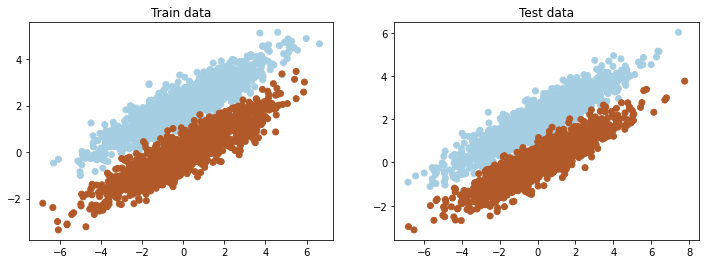

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].scatter(train[:, 0], train[:, 1], c=labels, cmap=plt.cm.Paired)
axs[0].set_title('Train data')

axs[1].scatter(test[:, 0], test[:, 1], c=labels, cmap=plt.cm.Paired)
axs[1].set_title('Test data')

plt.show(fig)

**II.** Classifique os exemplos de $X_{test}$ utilizando a regra de decisão Bayesiana.

In [4]:
def bayes_clf(X, mu):
    preds = []
    for sample in X:
        pred = 1
        mean_diff = mu[0] - mu[1]
        if np.dot(mean_diff, sample) - 0.5 * (np.dot(mu[0], mu[0]) - np.dot(mu[1], mu[1])) < 0:
            pred = 2
        preds.append(pred)
        
    return preds

In [5]:
# Estima a média das distribuições
mu_ml = (1/N)*np.sum(np.split(train, nclass), axis=1)
preds_bayes = bayes_clf(test, mu_ml)

**III.** Crie um modelo com base em Logistic Regression Classifier utilizando o conjunto $X$ e avalie o desempenho desse classificador no conjunto $X_{test}$.

In [6]:
clf = LogisticRegression().fit(train, labels)
preds_lr = clf.predict(test)

**IV.** Comente e compare os resultados obtidos em II e III.

In [7]:
err_bayes = np.count_nonzero(preds_bayes != labels) / total * 100
err_lr = np.count_nonzero(preds_lr != labels) / total * 100

print("Erro de classificação:")
print("Classificador Bayesiano: {:.4f}%".format(err_bayes))
print("Logistic Regression:     {:.4f}%".format(err_lr))

Erro de classificação:
Classificador Bayesiano: 13.1667%
Logistic Regression:     0.9000%


Podemos observar que o classificador baseado em Logistic Regression obteve um erro muito pequeno quando comparado ao classificador Bayesiano. Isso parece indicar que a distribuição desses dados favorece a Logistic Regression.

**V.** Repita e compare os passos de I a IV, considerando agora:

$$
\Sigma_2 = \begin{bmatrix}4 & -1.8 \\-1.8 & 1 \end{bmatrix}
$$

In [8]:
# Passo 1: Gerando e plotando os dados
sigma2 = np.matrix([[4, -1.8], [-1.8, 1]])

train = np.vstack([np.random.multivariate_normal(m, sigma1, N) for m in mu])
test  = np.vstack([np.random.multivariate_normal(m, sigma2, N) for m in mu])

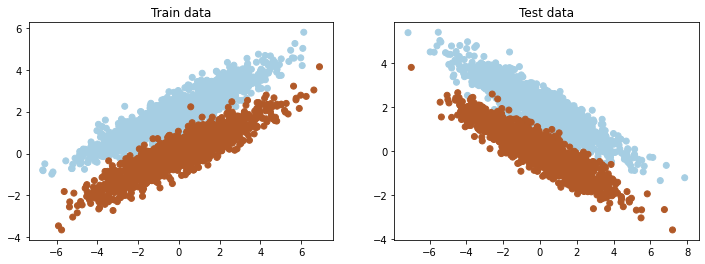

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].scatter(train[:, 0], train[:, 1], c=labels, cmap=plt.cm.Paired)
axs[0].set_title('Train data')

axs[1].scatter(test[:, 0], test[:, 1], c=labels, cmap=plt.cm.Paired)
axs[1].set_title('Test data')

plt.show(fig)

In [10]:
# Passo 2: Classificando com regra de decisão Bayesiana

# Estima a média das distribuições
mu_ml = (1/N)*np.sum(np.split(train, nclass), axis=1)
preds_bayes = bayes_clf(test, mu_ml)

In [11]:
# Passo 3: Classificando com Logistic Regression
clf = LogisticRegression(random_state=42).fit(train, labels)
preds_lr = clf.predict(test)

In [12]:
# Passo 4: Comparando resultados
err_bayes = np.count_nonzero(preds_bayes != labels) / total * 100
err_lr = np.count_nonzero(preds_lr != labels) / total * 100

print("Erro de classificação:")
print("Classificador Bayesiano: {:.4f}%".format(err_bayes))
print("Logistic Regression:     {:.4f}%".format(err_lr))

Erro de classificação:
Classificador Bayesiano: 19.0000%
Logistic Regression:     29.7000%


Diferente do experimento anterior, o classificador Bayesiano atingiu resultados muito melhores que a Logistic Regression. Isso pode indicar que o classificador Bayesiano é mais robusto em relação a algumas transformações nos dados, bem como uma melhor capacidade de generalização.

**VI.** Repita a análise para a Logistic Regression, considerando agora regularização com diferentes valores de $\lambda$ (definidos por você). Qual o efeito da regularização, comparando o desempenho de treinamento e teste?

In [13]:
def lr_clf(C):
    clf = LogisticRegression(C=C, random_state=42).fit(train, labels)
    
    preds_train = clf.predict(train)
    err_train = np.count_nonzero(preds_train != labels) / total * 100
    
    preds_test = clf.predict(test)
    err_test = np.count_nonzero(preds_test != labels) / total * 100
    
    print("Logistic Regression para C = {:6}: Treino - {:.4f}%\tTeste - {:.4f}%".format(C, err_train, err_test))

In [14]:
print("Erro de classificação:")
C = [1e-6, 1e-5, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
for c in C:
    lr_clf(c)

Erro de classificação:
Logistic Regression para C =  1e-06: Treino - 26.7667%	Teste - 26.6333%
Logistic Regression para C =  1e-05: Treino - 13.2333%	Teste - 19.6667%
Logistic Regression para C = 0.0001: Treino - 8.8333%	Teste - 22.4333%
Logistic Regression para C =  0.001: Treino - 1.4667%	Teste - 27.9000%
Logistic Regression para C =   0.01: Treino - 1.0000%	Teste - 29.3667%
Logistic Regression para C =    0.1: Treino - 1.0000%	Teste - 29.5333%
Logistic Regression para C =      1: Treino - 1.0000%	Teste - 29.7000%
Logistic Regression para C =      5: Treino - 1.0000%	Teste - 29.7333%
Logistic Regression para C =     10: Treino - 0.9667%	Teste - 29.7333%


Podemos observar que quanto maior o desempenho para o conjunto de treino, menor o desempenho para o conjunto de teste. Isso indica um _overfitting_ no modelo, fazendo com que haja uma preocupação muito grande em obter um bom resultado no conjunto de treino, mas sacrificando a capacidade de generalização do modelo. O melhor resultado para o conjunto de teste foi obtido com $C = 0.00001$, onde o modelo não teve um desempenho excelente durante o treino, de maneira a não comprometer sua capacidade de generalização.

Podemos observar, também, que para valores muito baixos de $C$ parece haver uma forma de _underfitting_, onde o modelo não consegue se ajustar bem aos dados de treinamento, comprometendo também seu desempenho com os dados de teste.